# What affects the price of rental house in Porto Alegre?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format='svg'

In [2]:
data=pd.read_csv('/Users/jidekickpush/Documents/GitHub/0323_2020DATAPAR/Projects/Team Project 3/Data/df_PortoAlegre_cleaned.csv')

In [3]:
data.head(1)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841


In [4]:
data.shape

(1193, 13)

In [5]:
df=data.copy()

In [6]:
columns_to_drop=['city','property_tax','fire_insurance','total']

In [7]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [8]:
df.head()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount
0,80,1,1,1,6,1,0,1000,2800
1,51,2,1,0,2,1,0,270,1112
2,38,1,1,2,11,0,0,450,1750
3,40,1,1,1,6,1,1,390,2990
4,42,1,1,2,2,1,1,190,1770


# Viz from Porto Alegre

In [9]:
df.corr()

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount
area,1.000000,0.690124,0.735206,0.663963,-0.176301,0.064102,0.074250,0.095235,0.699550
rooms,0.690124,1.000000,0.705644,0.569627,-0.154587,0.120585,-0.024912,0.062438,0.546301
bathroom,0.735206,0.705644,1.000000,0.641386,-0.093025,0.094720,0.043032,0.142512,0.702234
parking_spaces,0.663963,0.569627,0.641386,1.000000,-0.078151,0.074326,0.086537,0.073804,0.588849
floor,-0.176301,-0.154587,-0.093025,-0.078151,1.000000,0.002799,0.020985,0.193469,-0.028537
animal,0.064102,0.120585,0.094720,0.074326,0.002799,1.000000,-0.149336,0.017036,0.010464
furniture,0.074250,-0.024912,0.043032,0.086537,0.020985,-0.149336,1.000000,0.053132,0.189381
hoa,0.095235,0.062438,0.142512,0.073804,0.193469,0.017036,0.053132,1.000000,0.158565
rent_amount,0.699550,0.546301,0.702234,0.588849,-0.028537,0.010464,0.189381,0.158565,1.000000


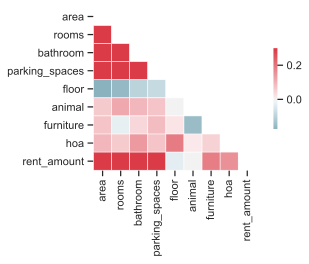

In [10]:
# your code here
from string import ascii_letters
sns.set(style="ticks")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [11]:
data._get_numeric_data().columns

Index(['area', 'rooms', 'bathroom', 'parking_spaces', 'floor', 'animal',
       'furniture', 'hoa', 'rent_amount', 'property_tax', 'fire_insurance',
       'total'],
      dtype='object')

In [12]:
num_features=list(set(data._get_numeric_data().columns)-set(['rent_amount','total','property_tax','fire_insurance']))

In [13]:
len(num_features)

8

In [14]:
#fig, axes=plt.subplots(4,2,figsize=(10,12))

#for idx,feature in enumerate(num_features):
#    ax=axes[int(idx/2),idx%2]
#    sns.boxplot(x='rent_amount', y= feature, data=data, ax=ax)
#    ax.set_xlabel('')
#    ax.set_ylabel(feature)

# Modeling

In [15]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [16]:
y=df.rent_amount
X=df.drop('rent_amount',axis=1)

In [17]:
model=sm.OLS(y,add_constant(X))

In [18]:
model_fit=model.fit()

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     223.3
Date:                Fri, 01 May 2020   Prob (F-statistic):          2.45e-230
Time:                        14:17:28   Log-Likelihood:                -10325.
No. Observations:                1193   AIC:                         2.067e+04
Df Residuals:                    1184   BIC:                         2.071e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -174.7197    143.333     -1.219      0.223    -455.935     106.496
area               7.8421      0.671     11.682      0.000       6.525       9.159
rooms            -32.2470     58.562     -0.551      0.582    -147.143      82.649
bathroom         795.5605     65.608     12.126      0.000     666.839     924.282
parking_spaces   211.9888     49.379      4.293      0.000     115.108     308.870
floor             36.9080     10.875      3.394      0.001      15.572      58.243
animal          -219.9715    112.907     -1.948      0.052    -441.493       1.550
furniture        632.0038     93.306      6.773      0.000     448.941     815.067
hoa                0.0939      0.040      2.365      0.018       0.016       0.172
==============================================================================
Omnibus:                      876.012   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37021.139
Skew:                           2.906   Prob(JB):                         0.00
Kurtosis:                      29.664   Cond. No.                     4.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
def func(column,X):
    #drop the column
    if column:
        X=X.drop(column, axis=1)
    # build the model
    model=sm.OLS(y,add_constant(X))
    #fit it
    model_fit=model.fit()
    #display the model
    display(model_fit.summary())
    #return X without the column
    return X

# P-Hacking

**P-value is probability of being wrong by rejecting Null Hypothesis**.

In [21]:
droped_columns=[]

In [22]:
droped_columns.append('rooms')
print(droped_columns)
X=func(droped_columns[-1],X)

['rooms']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_amount   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     255.3
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.72e-231
Time:                        14:17:28   Log-Likelihood:                -10325.
No. Observations:                1193   AIC:                         2.067e+04
Df Residuals:                    1185   BIC:                         2.071e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -206.2526    131.358     -1.570      0.117    -463.973      51.468
area               7.7316      0.640     12.073      0.000       6.475       8.988
bathroom         782.3076     61.016     12.821      0.000     662.596     902.020
parking_spaces   209.1860     49.102      4.260      0.000     112.850     305.522
floor             37.3189     10.846      3.441      0.001      16.040      58.598
animal          -224.2043    112.612     -1.991      0.047    -445.146      -3.262
furniture        637.0851     92.821      6.864      0.000     454.974     819.197
hoa                0.0946      0.040      2.384      0.017       0.017       0.172
==============================================================================
Omnibus:                      876.841   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36653.886
Skew:                           2.914   Prob(JB):                         0.00
Kurtosis:                      29.522   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print('To optimize the model, here we removed', len(droped_columns), 'columns:', droped_columns)

To optimize the model, here we removed 1 columns: ['rooms']


# Now we can study our y and y_pred

In [24]:
y=pd.DataFrame(data.rent_amount)